In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import cv2
import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Dataset
import torchvision.transforms as transforms
from dish_autoencooder import ConvAutoencoder

In [2]:
PATH_GPU = "/home/pgliwny/computer_vision_project/data"
PATH_ADATA = "/media/pgliwny/ADATA HD330/Computer_vision_for_MAGIC/prepare_images/data"
H5_PATH = os.path.join(PATH_GPU, "webcam_images.h5")

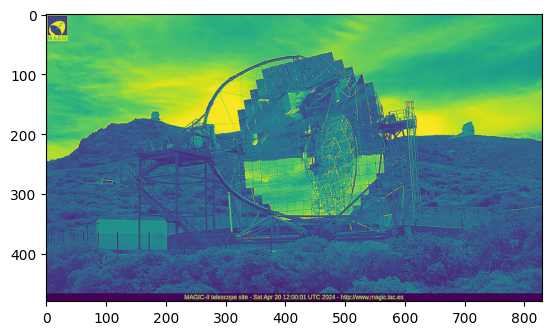

In [3]:
event_id = 15
f = h5py.File(H5_PATH, "r")
keys = list(f["images"].keys())
img = f["images"][keys[event_id]]["image"][:]
plt.imshow(img)

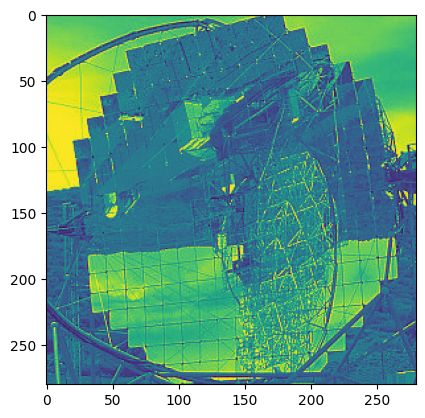

In [7]:
dish_img = img[65:345, 300:580]
plt.imshow(dish_img)

In [8]:
dish_img.shape

(280, 280)

In [9]:
class DishImageDataset(Dataset):
    def __init__(self, images, transform=None):
        self.images = images
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        if self.transform:
            image = self.transform(image)
        return image

In [11]:
img_dish = np.zeros((100, 1, 280, 280))
for i, event_id in enumerate(range(100)):
    img = f["images"][keys[event_id]]["image"][:]
    new_img = img[65:345, 300:580]
    img_dish[i, :, :, :] = new_img

In [14]:
# Preprocess and normalize the images
X_tensor = torch.tensor(img_dish, dtype=torch.float32)

# Normalize to range [0, 1] and make sure the tensor is of correct shape
X_tensor = (X_tensor - X_tensor.min()) / (X_tensor.max() - X_tensor.min())  # Normalize

# Define transform for input image if needed
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Dataset and DataLoader
dataset = DishImageDataset(X_tensor, transform=transform)
data_loader = DataLoader(dataset, batch_size=16, shuffle=True)


Epoch 1/60: 100%|█████████████████████████████████| 7/7 [00:00<00:00, 12.84it/s]


Epoch [1/60], Loss: 0.1830


Epoch 2/60: 100%|█████████████████████████████████| 7/7 [00:00<00:00, 12.98it/s]


Epoch [2/60], Loss: 0.1003


Epoch 3/60: 100%|█████████████████████████████████| 7/7 [00:00<00:00, 12.91it/s]


Epoch [3/60], Loss: 0.0871


Epoch 4/60: 100%|█████████████████████████████████| 7/7 [00:00<00:00, 13.08it/s]


Epoch [4/60], Loss: 0.0758


Epoch 5/60: 100%|█████████████████████████████████| 7/7 [00:00<00:00, 12.94it/s]


Epoch [5/60], Loss: 0.0681


Epoch 6/60: 100%|█████████████████████████████████| 7/7 [00:00<00:00, 13.05it/s]


Epoch [6/60], Loss: 0.0666


Epoch 7/60: 100%|█████████████████████████████████| 7/7 [00:00<00:00, 12.98it/s]


Epoch [7/60], Loss: 0.0630


Epoch 8/60: 100%|█████████████████████████████████| 7/7 [00:00<00:00, 13.04it/s]


Epoch [8/60], Loss: 0.0613


Epoch 9/60: 100%|█████████████████████████████████| 7/7 [00:00<00:00, 12.86it/s]


Epoch [9/60], Loss: 0.0614


Epoch 10/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 12.80it/s]


Epoch [10/60], Loss: 0.0604


Epoch 11/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 12.69it/s]


Epoch [11/60], Loss: 0.0572


Epoch 12/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 12.50it/s]


Epoch [12/60], Loss: 0.0561


Epoch 13/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 13.01it/s]


Epoch [13/60], Loss: 0.0548


Epoch 14/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 13.32it/s]


Epoch [14/60], Loss: 0.0552


Epoch 15/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 12.96it/s]


Epoch [15/60], Loss: 0.0576


Epoch 16/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 12.97it/s]


Epoch [16/60], Loss: 0.0535


Epoch 17/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 12.86it/s]


Epoch [17/60], Loss: 0.0540


Epoch 18/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 12.92it/s]


Epoch [18/60], Loss: 0.0539


Epoch 19/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 12.61it/s]


Epoch [19/60], Loss: 0.0534


Epoch 20/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 12.85it/s]


Epoch [20/60], Loss: 0.0550


Epoch 21/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 13.04it/s]


Epoch [21/60], Loss: 0.0516


Epoch 22/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 13.02it/s]


Epoch [22/60], Loss: 0.0517


Epoch 23/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 12.97it/s]


Epoch [23/60], Loss: 0.0510


Epoch 24/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 12.73it/s]


Epoch [24/60], Loss: 0.0509


Epoch 25/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 12.83it/s]


Epoch [25/60], Loss: 0.0507


Epoch 26/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 12.73it/s]


Epoch [26/60], Loss: 0.0526


Epoch 27/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 13.14it/s]


Epoch [27/60], Loss: 0.0503


Epoch 28/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 12.97it/s]


Epoch [28/60], Loss: 0.0528


Epoch 29/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 12.82it/s]


Epoch [29/60], Loss: 0.0491


Epoch 30/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 12.68it/s]


Epoch [30/60], Loss: 0.0500


Epoch 31/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 12.70it/s]


Epoch [31/60], Loss: 0.0500


Epoch 32/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 12.85it/s]


Epoch [32/60], Loss: 0.0495


Epoch 33/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 12.85it/s]


Epoch [33/60], Loss: 0.0492


Epoch 34/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 13.00it/s]


Epoch [34/60], Loss: 0.0484


Epoch 35/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 12.97it/s]


Epoch [35/60], Loss: 0.0486


Epoch 36/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 13.44it/s]


Epoch [36/60], Loss: 0.0499


Epoch 37/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 13.13it/s]


Epoch [37/60], Loss: 0.0503


Epoch 38/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 12.86it/s]


Epoch [38/60], Loss: 0.0503


Epoch 39/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 13.05it/s]


Epoch [39/60], Loss: 0.0490


Epoch 40/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 13.22it/s]


Epoch [40/60], Loss: 0.0485


Epoch 41/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 12.93it/s]


Epoch [41/60], Loss: 0.0477


Epoch 42/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 13.30it/s]


Epoch [42/60], Loss: 0.0485


Epoch 43/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 13.30it/s]


Epoch [43/60], Loss: 0.0479


Epoch 44/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 13.58it/s]


Epoch [44/60], Loss: 0.0478


Epoch 45/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 13.18it/s]


Epoch [45/60], Loss: 0.0479


Epoch 46/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 13.38it/s]


Epoch [46/60], Loss: 0.0486


Epoch 47/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 13.38it/s]


Epoch [47/60], Loss: 0.0509


Epoch 48/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 13.19it/s]


Epoch [48/60], Loss: 0.0467


Epoch 49/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 13.33it/s]


Epoch [49/60], Loss: 0.0475


Epoch 50/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 13.03it/s]


Epoch [50/60], Loss: 0.0507


Epoch 51/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 12.64it/s]


Epoch [51/60], Loss: 0.0472


Epoch 52/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 13.52it/s]


Epoch [52/60], Loss: 0.0463


Epoch 53/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 13.24it/s]


Epoch [53/60], Loss: 0.0523


Epoch 54/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 13.44it/s]


Epoch [54/60], Loss: 0.0487


Epoch 55/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 13.25it/s]


Epoch [55/60], Loss: 0.0484


Epoch 56/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 12.98it/s]


Epoch [56/60], Loss: 0.0475


Epoch 57/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 13.51it/s]


Epoch [57/60], Loss: 0.0470


Epoch 58/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 13.13it/s]


Epoch [58/60], Loss: 0.0472


Epoch 59/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 13.14it/s]


Epoch [59/60], Loss: 0.0479


Epoch 60/60: 100%|████████████████████████████████| 7/7 [00:00<00:00, 13.54it/s]


Epoch [60/60], Loss: 0.0474


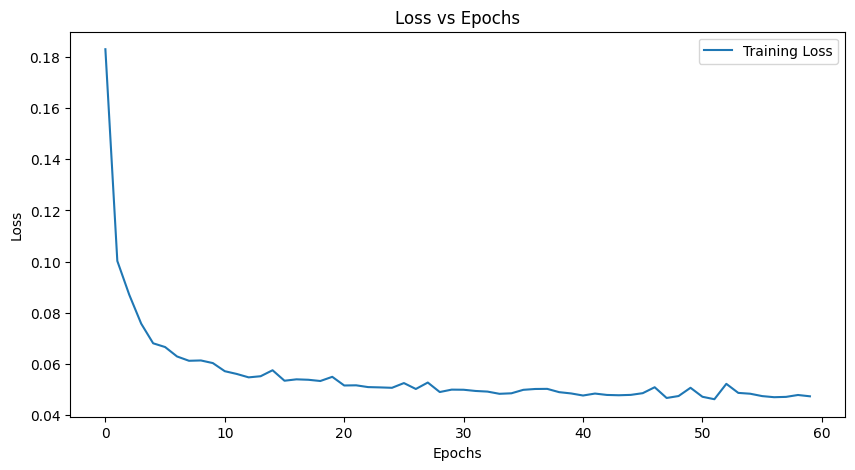

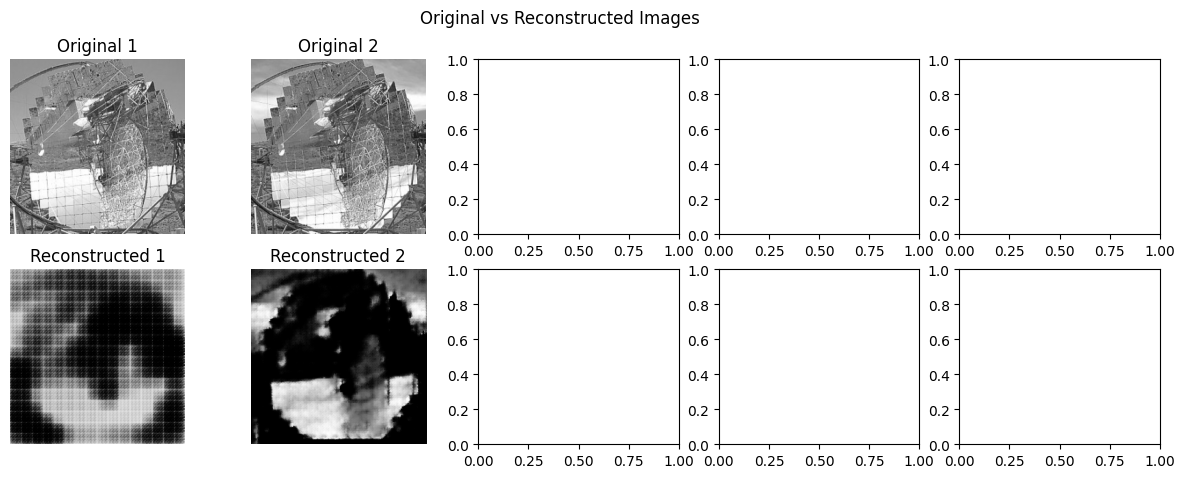

In [21]:
# Define the model (DishAutoencoder) with feature_dim=64 as you provided earlier
model = ConvAutoencoder()

# Loss function (Mean Squared Error Loss for reconstruction)
criterion = nn.MSELoss()

# Optimizer (Adam optimizer)
optimizer = optim.Adam(model.parameters(), lr=1e-2)

# Initialize lists to track loss and reconstructed images for plotting
epoch_losses = []
original_images = []
reconstructed_images = []

# Training loop
num_epochs = 60
model.train()  # Set model to training mode

for epoch in range(num_epochs):
    running_loss = 0.0
    for images in tqdm.tqdm(data_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        optimizer.zero_grad()  # Zero the gradients

        # Ensure the images tensor is of correct shape: [batch_size, channels, height, width]
        images = images.float()

        # Forward pass: Get the reconstructed image and feature vector
        reconstructed = model(images)

        # Compute the reconstruction loss
        loss = criterion(reconstructed, images)  # Comparing the original image with the reconstructed image

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Accumulate the loss
        running_loss += loss.item()

    # Calculate average loss for this epoch
    avg_loss = running_loss / len(data_loader)
    epoch_losses.append(avg_loss)

    # Store images for later visualization (you can choose to save them periodically)
    if epoch % 10 == 0:  # For example, save images every 10 epochs
        original_images.append(images[0].detach().cpu().numpy().squeeze())  # Save the first image in the batch
        reconstructed_images.append(reconstructed[0].detach().cpu().numpy().squeeze())  # Save the reconstructed image

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

# Plotting Loss over Epochs
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), epoch_losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.show()

# Plotting some original and reconstructed images from the last epoch
# Make sure to visualize only a few images for comparison
fig, axes = plt.subplots(2, 5, figsize=(15, 5))
for i in range(2):
    axes[0, i].imshow(original_images[i], cmap="gray")
    axes[0, i].set_title(f"Original {i+1}")
    axes[0, i].axis("off")

    axes[1, i].imshow(reconstructed_images[i], cmap="gray")
    axes[1, i].set_title(f"Reconstructed {i+1}")
    axes[1, i].axis("off")

plt.suptitle("Original vs Reconstructed Images")
plt.show()


In [22]:
len(reconstructed_images)

6

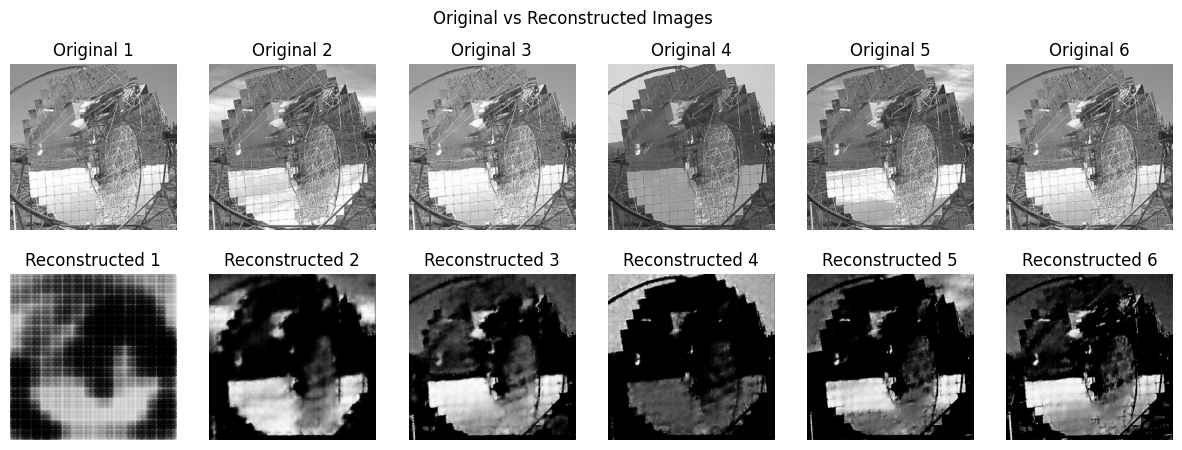

In [24]:
fig, axes = plt.subplots(2, 6, figsize=(15, 5))
for i in range(6):
    axes[0, i].imshow(original_images[i], cmap="gray")
    axes[0, i].set_title(f"Original {i+1}")
    axes[0, i].axis("off")

    axes[1, i].imshow(reconstructed_images[i], cmap="gray")
    axes[1, i].set_title(f"Reconstructed {i+1}")
    axes[1, i].axis("off")

plt.suptitle("Original vs Reconstructed Images")
plt.show()